# ***Tipe Data Understanding & Deteksi Outlier Menggunakan KNN***

Sebelum memasuki materi selanjutnya, berikut akan ditampilkan hasil setelah data IRIS diubah.

In [1]:
!pip install mysql-connector-python psycopg2

import mysql.connector

# Koneksi ke MySQL
mysql_conn = mysql.connector.connect(
    host="irismysql-2739-irismysql-2739.l.aivencloud.com",  # Ganti dengan host MySQL Anda
    user="avnadmin",       # Ganti dengan username Anda
    password="AVNS_dO1A9DrK7DsaNfwz8pv", # Ganti dengan password Anda
    database="irismysql-2739",  # Ganti dengan nama database MySQL Anda
    port=19667,  # Tentukan port yang diinginkan (19667)
)

# Membuat cursor
mysql_cursor = mysql_conn.cursor()

# Mengambil data dari MySQL
mysql_query = "SELECT * FROM irismysql_2739"  # Ganti dengan query Anda
mysql_cursor.execute(mysql_query)
mysql_data = mysql_cursor.fetchall()
print("Data mysql: ", mysql_data)

import psycopg2

# Koneksi ke PostgreSQL
postgres_conn = psycopg2.connect(
    host="irispostgresql-2739-irispostgresql-2739.l.aivencloud.com",  # Ganti dengan host PostgreSQL Anda
    database="defaultdb",  # Ganti dengan nama database PostgreSQL Anda
    user="avnadmin",  # Ganti dengan username Anda
    password="AVNS_VpqImPpZAlNzgDMQvOp",  # Ganti dengan password Anda
    port=15320  # Tentukan port yang diinginkan (15320)
)

# Membuat cursor
postgres_cursor = postgres_conn.cursor()

# Mengambil data dari PostgreSQL
postgres_query = "SELECT * FROM \"irispostgresql-2739\".irispostgresql"  # Ganti dengan query Anda
postgres_cursor.execute(postgres_query)
postgres_data = postgres_cursor.fetchall()
print("Data postgress: ", postgres_data)

import pandas as pd

# Mengonversi ke DataFrame Pandas
mysql_df = pd.DataFrame(mysql_data, columns=[desc[0] for desc in mysql_cursor.description])
postgres_df = pd.DataFrame(postgres_data, columns=[desc[0] for desc in postgres_cursor.description])

# Menggabungkan kedua DataFrame
combined_df = pd.concat([mysql_df, postgres_df], ignore_index=True)

# Menggabungkan berdasarkan kolom tertentu
combined_df = pd.merge(mysql_df, postgres_df, on=["id", "Class"], how="outer")  # Ganti "id" dengan kolom yang sesuai
print("Data Gabungan: ")
print(combined_df)

import seaborn as sns
import matplotlib.pyplot as plt

# Melihat 5 baris pertama dari mysql_df
print("Data 5 baris pertama dari MySQL:")
print(mysql_df.head())

# Melihat 5 baris pertama dari postgres_df
print("\nData 5 baris pertama dari PostgreSQL:")
print(postgres_df.head())

# Melihat 5 baris pertama dari combined_df
print("\n5 baris pertama Data Gabungan:")
print(combined_df.head())  # Menampilkan 5 baris pertama
print("\nInformasi Data Gabungan:")
print(combined_df.columns) # Menampilkan daftar kolom

# Pilih hanya kolom numerik
numeric_df = combined_df.select_dtypes(include=['float64', 'int64'])
# Korelasi antar kolom numerik
correlation_matrix = numeric_df.corr() #menghitung matriks korelasi antar kolom numerik dalam dataset.

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f") #untuk menunjukkan hubungan antara kolom.
plt.title("Matriks Korelasi")
plt.show()

# Visualisasi hubungan antar fitur (misalnya, scatter plot)
print("\nVisualisasi Hubungan Antar Fitur:")
if "sepal length" in combined_df.columns and "sepal width" in combined_df.columns and "Class" in combined_df.columns: # Pastikan combined_df memiliki kolom 'species' untuk membedakan warna
    species_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'red', 'Iris-virginica': 'green'}
    plt.figure(figsize=(8, 6))

    # Menggunakan matplotlib tanpa seaborn untuk scatter plot dengan warna berdasarkan spesies
    for species, color in species_colors.items():
        subset = combined_df[combined_df["Class"] == species]
        plt.scatter(subset["sepal length"], subset["sepal width"], label=species, color=color, edgecolors="black")

    plt.title("Sepal Length vs Sepal Width")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend(title='Class')
    plt.grid()
    plt.show()

import seaborn as sns

print("Informasi Tipe Data:")
print(combined_df.info())

print("\nStatistik Deskriptif:")
print(combined_df.describe())  # Statistik deskriptif

print("\nJumlah Missing Values:")
print(combined_df.isnull().sum())  # Cek missing values

print("\nJumlah Data Duplikat:")
print(combined_df.duplicated().sum())  # Cek data duplikat

print("Distribusi Data Iris")
# Membuat subplots dengan 2 baris dan 2 kolom untuk 4 histogram
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Membuat histogram untuk setiap kolom di combined_df
sns.histplot(combined_df['sepal length'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Sepal Length')

sns.histplot(combined_df['sepal width'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Sepal Width')

sns.histplot(combined_df['petal length'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Petal Length')

sns.histplot(combined_df['petal width'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Petal Width')

# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()


  Preparing metadata (setup.py) ... -

 \

 done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/33.9 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 33.8/33.9 MB 278.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 33.8/33.9 MB 278.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 59.1 MB/s eta 0:00:00


 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 / done


  Created wheel for psycopg2: filename=psycopg2-2.9.10-cp312-cp312-linux_x86_64.whl size=635638 sha256=c9b35e00b8adac4082760dcf00b7d212bcbe320f36d7a136ec88d38bea898551
  Stored in directory: /home/codespace/.cache/pip/wheels/ac/bb/ce/afa589c50b6004d3a06fc691e71bd09c9bd5f01e5921e5329b
Successfully built psycopg2



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


DatabaseError: 2005 (HY000): Unknown MySQL server host 'irismysql-2739-irismysql-2739.l.aivencloud.com' (-2)

### Data Understanding dan Jenis-Jenis Data

Data understanding adalah langkah pertama dalam analisis data yang bertujuan untuk memahami karakteristik data yang akan dianalisis. Dalam proses ini, kita mencoba untuk mengeksplorasi dan memeriksa data yang tersedia untuk mendapatkan pemahaman yang lebih dalam tentang strukturnya. Berikut adalah beberapa jenis data yang umumnya ditemukan dalam proses analisis:

1. **Data Kategorikal (Categorical Data)**:
   - Jenis data ini berisi kategori atau label, dan tidak dapat diukur secara numerik. Contoh: Jenis kelamin (pria/wanita), warna (merah, hijau, biru).
   - **Nominal**: Kategori tanpa urutan. Contoh: Warna, jenis kelamin.
   - **Ordinal**: Kategori dengan urutan tertentu. Contoh: Skala kepuasan pelanggan (sangat tidak puas, tidak puas, puas, sangat puas).

2. **Data Numerik (Numerical Data)**:
   - Jenis data ini berisi angka dan bisa diukur serta dihitung.
   - **Diskrit**: Data numerik yang hanya dapat mengambil nilai tertentu. Contoh: Jumlah anak dalam keluarga.
   - **Kontinu**: Data numerik yang dapat mengambil nilai dalam rentang tertentu. Contoh: Berat badan, suhu.

3. **Data Teks (Text Data)**:
   - Data yang berbentuk teks, seperti email, komentar, atau tweet. Data ini sering digunakan dalam analisis sentimen atau pemrosesan bahasa alami.

4. **Data Waktu (Time Series Data)**:
   - Data yang terorganisir dalam urutan waktu. Contoh: Data suhu per jam, data penjualan per hari.

5. **Data Geospasial (Spatial Data)**:
   - Data yang berkaitan dengan lokasi dan posisi geografi, seperti koordinat latitude dan longitude.

---

### Deteksi Outlier dengan KNN (K-Nearest Neighbors) menggunakan Data Iris yang Sudah Diubah

**Outlier Detection menggunakan KNN** adalah metode yang digunakan untuk mendeteksi data yang berada jauh dari sebagian besar data lainnya. Dalam konteks KNN, outlier dianggap sebagai titik yang jaraknya lebih jauh dibandingkan dengan titik-titik lainnya dalam ruang fitur. KNN mendeteksi outlier berdasarkan kedekatannya dengan titik data lainnya.

#### Konsep Dasar KNN untuk Deteksi Outlier:
- **K-Nearest Neighbors (KNN)** adalah algoritma yang digunakan untuk mengklasifikasikan data berdasarkan kedekatannya dengan data lain.
- Dalam deteksi outlier, kita mengukur jarak antara titik data yang diuji dengan titik data lainnya, dan jika titik tersebut memiliki jarak yang lebih jauh dari titik data lainnya, maka titik tersebut dianggap sebagai outlier.
- Sebagai contoh, jika sebuah titik memiliki jarak yang lebih besar dari titik data lainnya, dan jika tidak memiliki cukup banyak tetangga dalam radius tertentu, maka titik tersebut bisa dianggap sebagai outlier.

#### Langkah-langkah Deteksi Outlier dengan KNN:
1. **Siapkan Data Iris**:
   - Ambil dataset Iris yang sering digunakan dalam analisis machine learning. Dataset ini memiliki fitur numerik seperti panjang dan lebar kelopak bunga serta panjang dan lebar daun dari tiga spesies bunga iris.

2. **Preprocessing dan Modifikasi Data**:
   - Ubah data Iris sesuai kebutuhan, misalnya dengan menambah noise atau mengubah beberapa nilai agar lebih menantang untuk mendeteksi outlier.

3. **Menggunakan KNN untuk Deteksi Outlier**:
   - Tentukan nilai `k` (jumlah tetangga terdekat).
   - Hitung jarak antara setiap titik data dan tetangga terdekatnya.
   - Tentukan threshold jarak untuk mendeteksi outlier. Jika jarak titik data lebih besar dari threshold ini, maka data tersebut dianggap sebagai outlier.

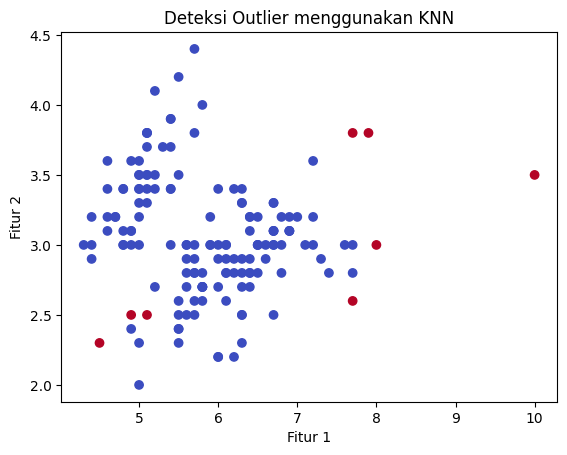

Outlier Detected: [ 41  98 106 117 118 131 150 151]


In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
# Load data Iris
data = load_iris()
X = data.data
y = data.target

# Modifikasi data untuk menambah outlier (misalnya menambahkan beberapa nilai ekstrem)
X_with_outliers = np.vstack([X, np.array([[8, 3, 5, 2], [10, 3.5, 7, 2.5]])])

# Menggunakan KNN untuk deteksi outlier
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_with_outliers)

# Menghitung jarak ke 5 tetangga terdekat
distances, indices = knn.kneighbors(X_with_outliers)

# Menentukan threshold jarak untuk mendeteksi outlier
distance_threshold = np.percentile(distances[:, -1], 95)

# Deteksi outlier
outliers = distances[:, -1] > distance_threshold

# Visualisasi data
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=outliers, cmap='coolwarm')
plt.title('Deteksi Outlier menggunakan KNN')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

# Output hasil deteksi outlier
print("Outlier Detected:", np.where(outliers)[0])

In [9]:
# Menampilkan hasil
print("Jumlah outlier terdeteksi:", len(outliers))
print("Index outlier:", outliers)

Jumlah outlier terdeteksi: 152
Index outlier: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False  True False
 False False False False False False False False False  True  True False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False  True  True]


In [10]:
print("Panjang array boolean (outliers) :" , len(outliers))
print("Panjang baris dataframe :" , len(combined_df))

Panjang array boolean (outliers) : 152
Panjang baris dataframe : 150


In [13]:
print("Sampel Data yang Terdeteksi sebagai Outlier pada Dataset IRIS")
# Menampilkan sampel yang terdeteksi sebagai outlier
outliers = outliers[:len(combined_df)] # Pastikan array outliers memiliki panjang yang sama dengan dataframe

# Sekarang gunakan indeks boolean untuk memilih baris
outliers_data = combined_df[outliers]
print(outliers_data)


Sampel Data yang Terdeteksi sebagai Outlier pada Dataset IRIS
      id            Class  petal length  petal width  sepal length  \
41    42      Iris-setosa           1.3          0.3           4.5   
98    99  Iris-versicolor           3.0          1.1           5.1   
106  107   Iris-virginica           4.5          1.7           4.9   
117  118   Iris-virginica           6.7          2.2           7.7   
118  119   Iris-virginica           6.9          2.3           7.7   
131  132   Iris-virginica           6.4          2.0           7.9   

     sepal width  
41           2.3  
98           2.5  
106          2.5  
117          3.8  
118          2.6  
131          3.8  


#### Penjelasan:
1. **Memuat Dataset Iris**: Menggunakan dataset Iris yang tersedia di `sklearn`.
2. **Menambah Outlier**: Dua nilai ekstrem ditambahkan ke dataset untuk menggambarkan outlier.
3. **KNN untuk Deteksi Outlier**: KNN digunakan dengan 5 tetangga terdekat untuk menghitung jarak antar data dan mengidentifikasi outlier berdasarkan jarak.
4. **Threshold Jarak**: Threshold ditentukan dengan mengambil persentil 95 dari jarak-jarak tersebut. Titik data yang jaraknya lebih besar dari nilai ini dianggap sebagai outlier.
5. **Visualisasi**: Menampilkan plot 2D dari data, di mana titik-titik yang dianggap outlier diberi warna berbeda.

Dengan pendekatan ini, kita dapat mendeteksi titik-titik yang jauh berbeda dari mayoritas data dan mengklasifikasikannya sebagai outlier.